<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

* Preprocessing and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
countries = np.array(["Nepal", "Nepal", "India", "Nepal", "India"]).reshape(5, 1)

In [4]:
countries

array([['Nepal'],
       ['Nepal'],
       ['India'],
       ['Nepal'],
       ['India']], dtype='<U5')

In [5]:
encoder = LabelEncoder()
encoder.fit_transform(countries)

C:\Users\atish\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 1, 0], dtype=int64)

In [6]:
encoder = OneHotEncoder(sparse=False)

In [7]:
encoder.fit_transform(countries)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [8]:
data = np.random.normal(10, 2, 1000).reshape(-1, 1)

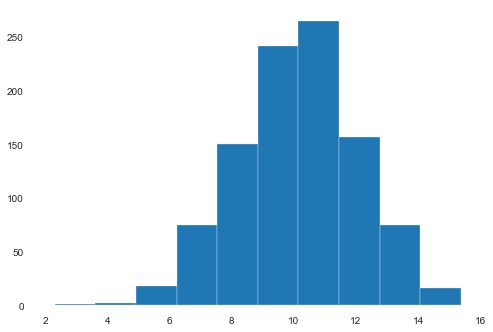

In [9]:
plt.hist(data)
plt.show()

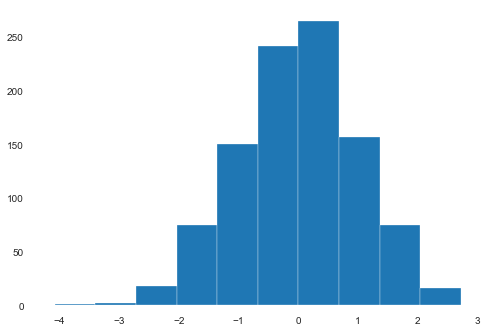

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

plt.hist(scaled)
plt.show()

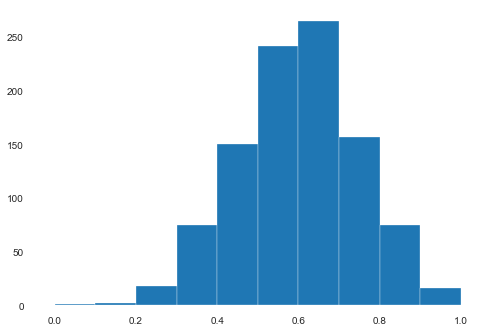

In [11]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

plt.hist(scaled)
plt.show()

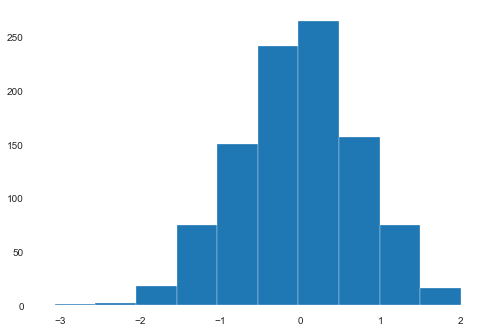

In [12]:
scaler = RobustScaler()
scaled = scaler.fit_transform(data)

plt.hist(scaled)
plt.show()

In [13]:
data = sns.load_dataset("titanic")

In [14]:
data.to_csv("titanic.csv", index=False)

In [15]:
data = pd.read_csv("titanic.csv")

In [16]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
data.profile_report(progress_bar=False)

In [18]:
data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [19]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
duplicate_cols = ["survived", "pclass", "sex", "adult_male", "deck", "embark_town", "alone"]

In [21]:
data.drop(duplicate_cols, axis=1, inplace=True)

In [22]:
data

,age,sibsp,parch,fare,embarked,class,who,alive
0,22.0,1,0,7.2500,S,Third,man,no
1,38.0,1,0,71.2833,C,First,woman,yes
2,26.0,0,0,7.9250,S,Third,woman,yes
3,35.0,1,0,53.1000,S,First,woman,yes
4,35.0,0,0,8.0500,S,Third,man,no
...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,S,Second,man,no
887,19.0,0,0,30.0000,S,First,woman,yes
888,NaN,1,2,23.4500,S,Third,woman,no
889,26.0,0,0,30.0000,C,First,man,yes


In [23]:
data.groupby(by="who", axis=0).mean()

,age,sibsp,parch,fare
who,,,,
child,6.369518,1.734940,1.265060,32.785795
man,33.173123,0.296089,0.152700,24.864182
woman,32.000000,0.601476,0.564576,46.570711


In [24]:
data.pivot_table(index=["who"], columns=["class", "embarked"], values=["age", "fare"], 
                 aggfunc={"age":np.sum, "fare":np.mean}, fill_value=0)

age                                                        \
class    First              Second                Third                
embarked     C   Q        S      C   Q        S       C      Q     S   
who                                                                    
child        0   0    46.92   18.0   0    68.33  130.42   36.0   229   
man       1444  44  2665.50  206.5  57  2759.50  587.00  373.0  5564   
woman     1370  33  1408.00  117.0  30  1912.50  133.00  213.5  1659   

                fare                                                          \
class          First                     Second                        Third   
embarked           C   Q           S          C      Q          S          C   
who                                                                            
child       0.000000   0  139.382633  36.218067   0.00  26.843750  13.503900   
man        93.536707  90   50.389967  24.134256  12.35  18.615730   9.137721   
woman     115.640309  90   94.897871  21.045840  12.35  21.142373  15.099992   

                                
class                           
embarked          Q          S  
who                             
child     24.905840  26.833771  
man        9.958451  11.888209  
woman     10.379041  17.672383

In [25]:
data.head()

,age,sibsp,parch,fare,embarked,class,who,alive
0,22.0,1,0,7.2500,S,Third,man,no
1,38.0,1,0,71.2833,C,First,woman,yes
2,26.0,0,0,7.9250,S,Third,woman,yes
3,35.0,1,0,53.1000,S,First,woman,yes
4,35.0,0,0,8.0500,S,Third,man,no


In [26]:
data.isna().sum()

age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alive         0
dtype: int64

In [27]:
mean_age = data["age"].mean()
std_age = 8

In [28]:
filling_values = np.random.normal(mean_age, std_age, size=177)

In [29]:
def get_random_age():
    return float(np.random.choice(filling_values))

In [30]:
data["age"] = data["age"].fillna(get_random_age())

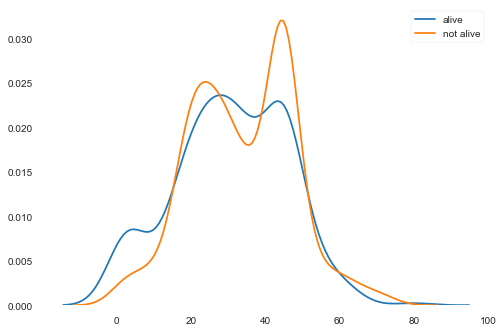

In [31]:
sns.kdeplot(data[data["alive"] == "yes"]["age"], label="alive")
sns.kdeplot(data[data["alive"] == "no"]["age"], label="not alive")
plt.show()

In [35]:
data.isna().sum()

age          0
sibsp        0
parch        0
fare         0
embarked     2
class        0
who          0
alive        0
age_group    0
dtype: int64

In [36]:
data["age_group"] = pd.cut(data["age"], [0, 15, 50, 65, 80])

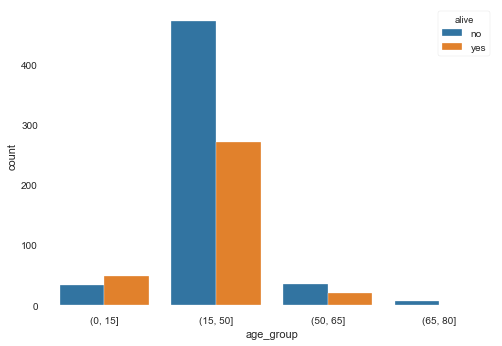

In [37]:
sns.countplot("age_group", data=data, hue="alive")
plt.show()

In [38]:
data["family"] = data["sibsp"] + data["parch"]

In [39]:
data = data.drop(["age_group", "sibsp", "parch"], axis=1)

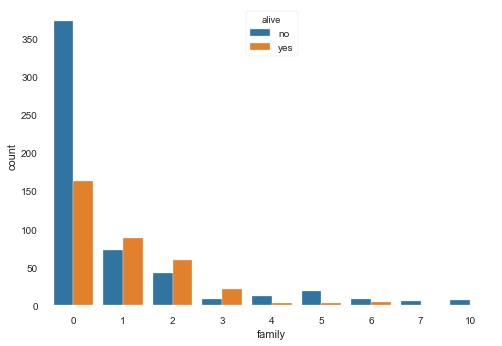

In [40]:
sns.countplot("family", hue="alive", data=data)
plt.show()

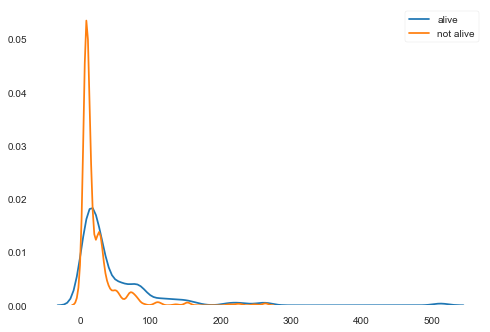

In [41]:
sns.kdeplot(data[ data["alive"] == "yes"]["fare"], label="alive")
sns.kdeplot(data[ data["alive"] == "no"]["fare"], label="not alive")
plt.show()

In [42]:
data[data["alive"] == "yes"]["fare"]

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64

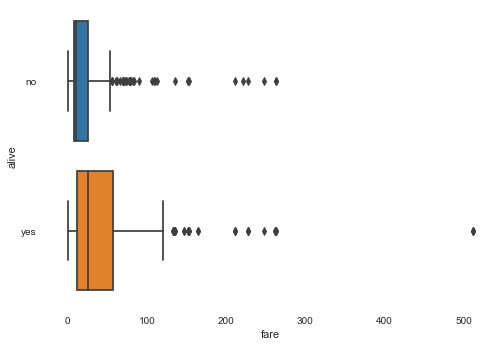

In [43]:
sns.boxplot("fare", "alive", data=data)
plt.show()

In [44]:
data.columns

Index(['age', 'fare', 'embarked', 'class', 'who', 'alive', 'family'], dtype='object')

In [45]:
data["embarked"] = data["embarked"].fillna("S")

In [46]:
data["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

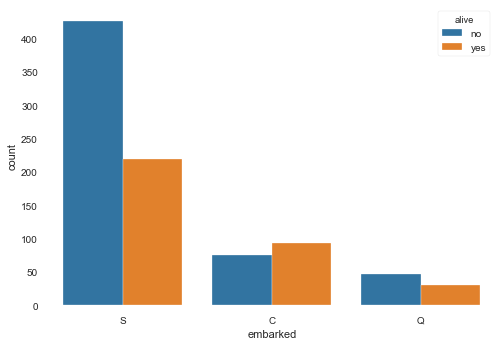

In [47]:
sns.countplot("embarked", hue="alive", data=data)
plt.show()

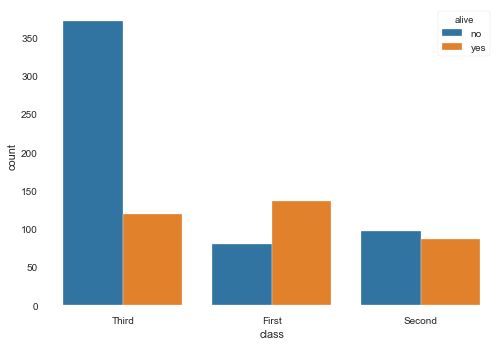

In [48]:
sns.countplot("class", hue="alive", data=data)
plt.show()

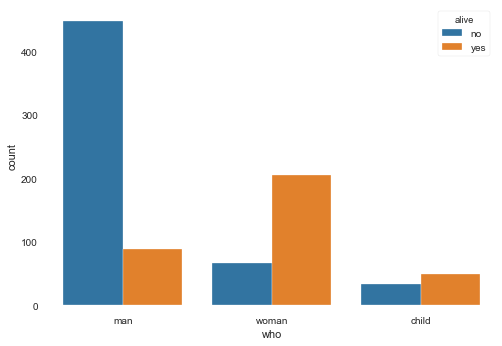

In [49]:
sns.countplot("who", hue="alive", data=data)
plt.show()

In [50]:
data.dtypes

age         float64
fare        float64
embarked     object
class        object
who          object
alive        object
family        int64
dtype: object

In [51]:
from sklearn.preprocessing import RobustScaler

In [52]:
num_cols = ["age", "fare", "family"]
scaler = RobustScaler()

scaler.fit(data[num_cols])
data[num_cols] = scaler.transform(data[num_cols])

In [53]:
data

,age,fare,embarked,class,who,alive,family
0,-0.437677,-0.312011,S,Third,man,no,1.0
1,0.262606,2.461242,C,First,woman,yes,1.0
2,-0.262606,-0.282777,S,Third,woman,yes,0.0
3,0.131303,1.673732,S,First,woman,yes,1.0
4,0.131303,-0.277363,S,Third,man,no,0.0
...,...,...,...,...,...,...,...
886,-0.218838,-0.062981,S,Second,man,no,0.0
887,-0.568980,0.673281,S,First,woman,yes,0.0
888,0.562323,0.389604,S,Third,woman,no,3.0
889,-0.262606,0.673281,C,First,man,yes,0.0


In [54]:
mapping = {
    "S": 0,
    "Q": 1,
    "C": 2
}

data["embarked"] = data["embarked"].map(mapping)

In [55]:
data["class"] = data["class"].map({"First":1, "Second":2, "Third":3})

In [56]:
data.dtypes

age         float64
fare        float64
embarked      int64
class         int64
who          object
alive        object
family      float64
dtype: object

In [57]:
data["who"] = data["who"].astype("category")

In [58]:
data.dtypes

age          float64
fare         float64
embarked       int64
class          int64
who         category
alive         object
family       float64
dtype: object

In [59]:
y = data["alive"]
X = data.drop("alive", axis=1)

In [60]:
X = pd.get_dummies(X)

In [61]:
X

,age,fare,embarked,class,family,who_child,who_man,who_woman
0,-0.437677,-0.312011,0,3,1.0,0,1,0
1,0.262606,2.461242,2,1,1.0,0,0,1
2,-0.262606,-0.282777,0,3,0.0,0,0,1
3,0.131303,1.673732,0,1,1.0,0,0,1
4,0.131303,-0.277363,0,3,0.0,0,1,0
...,...,...,...,...,...,...,...,...
886,-0.218838,-0.062981,0,2,0.0,0,1,0
887,-0.568980,0.673281,0,1,0.0,0,0,1
888,0.562323,0.389604,0,3,3.0,0,0,1
889,-0.262606,0.673281,2,1,0.0,0,1,0


In [62]:
y = y.map({"yes":1, "no": 0})

In [63]:
#convert to array
y = y.values